# Training and Testing Crime Prediction Using KNN - Jupyter Notebook 

## CAP4612 and CIS3950 Final Project


Instructions for running the model:
- <b>Part 1</b>: Download the folder.
- <b>Part 2</b>: Run the Jupyter Notebook in order to see the training/testing model on the dataset.
- <b>Part 3</b>: Access if possible to the Command Prompt (Commander from Anaconda Navigator), and type: 'pip install streamlit-folium' if you don't have the package installed already on your system.
- <b>Part 4</b>: Through the same Prompt, 'cd' to the downloaded folder.
- <b>Part 5</b>: Ensure the dependencies are installed by typing on the Prompt: 'pip install -r requirements.txt'.  
- <b>Part 5</b>: Run the streamlit app by typing the following Prompt: 'streamlit run streamlit_app.py' for a visual display of the data.



### References:
[1] Karpagam Academy of Higher Education, Coimbatore. (2023). Predicting High-Risk areas for crime Hotspot using hybrid KNN Machine Learning Framework. IEEE Conference Publication | IEEE Xplore. https://doi.org/10.1109/ICIRCA57980.2023.10220738 <br>
[2] Kumar, A., Verma, A., Shinde, G., Sukhdeve, Y., & Lal, N. (2020). Crime prediction using K-Nearest Neighboring algorithm. 2020 International Conference on Emerging Trends in Information Technology and Engineering (ic-ETITE). https://doi.org/10.1109/ic-etite47903.2020.155



### Author:
Lorena A. Quincoso-Lugones (lquin135@fiu.edu)<br>
Florida International University

#### =======================================================================================================

### First Steps: 
Analyzing data before training in order to comprehend data distribution and gradually applying feature engineering correctly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
sns.set(color_codes=True)

In [2]:
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

#To dosplay the top 5 rows
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [3]:
df.tail(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
955334,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
955335,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
955336,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
955337,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
955338,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [4]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
df = df.drop(['DR_NO', 'Date Rptd', 
              'Rpt Dist No', 'Crm Cd 1',
              'Crm Cd 2', 'Crm Cd 3', 
              'Crm Cd 4', 'Part 1-2'], axis = 1)
df.head(5)

,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
df = df.rename(columns={"Crm Cd": "Crime Committed", 
                        "Crm Cd Desc": "Crime Code Descript", 
                        "Mocodes": "Modus Operandi", 
                        "Status" : "Crime Status", 
                        "AREA NAME" : "AREA_NAME"})
df.head(5)

,DATE OCC,TIME OCC,AREA,AREA_NAME,Crime Committed,Crime Code Descript,Modus Operandi,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Crime Status,Status Desc,LOCATION,Cross Street,LAT,LON
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,1900 TRANSIENT,NaN,34.0944,-118.3277


In [7]:
df = df.rename(columns={"Crime Code Descript":"Crime_Code_Descript", 
                        "Status Desc": "Crime Status Descript", 
                        "Weapon Descript" : "Weapon Used Descript", 
                        "Premis Desc": "Premise Code Descript"})
df.head(5)

,DATE OCC,TIME OCC,AREA,AREA_NAME,Crime Committed,Crime_Code_Descript,Modus Operandi,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premise Code Descript,Weapon Used Cd,Weapon Desc,Crime Status,Crime Status Descript,LOCATION,Cross Street,LAT,LON
0,03/01/2020 12:00:00 AM,2130,7,Wilshire,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,02/08/2020 12:00:00 AM,1800,1,Central,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,11/04/2020 12:00:00 AM,1700,3,Southwest,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,1400 W 37TH ST,NaN,34.0210,-118.3002
3,03/10/2020 12:00:00 AM,2037,9,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,08/17/2020 12:00:00 AM,1200,6,Hollywood,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,1900 TRANSIENT,NaN,34.0944,-118.3277


In [8]:
df.shape

(955339, 20)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (2729, 20)


In [10]:
print(df.isnull().sum())

DATE OCC                      0
TIME OCC                      0
AREA                          0
AREA_NAME                     0
Crime Committed               0
Crime_Code_Descript           0
Modus Operandi           136675
Vict Age                      0
Vict Sex                 130045
Vict Descent             130055
Premis Cd                    12
Premise Code Descript       569
Weapon Used Cd           630320
Weapon Desc              630320
Crime Status                  1
Crime Status Descript         0
LOCATION                      0
Cross Street             806439
LAT                           0
LON                           0
dtype: int64


In [11]:
df = df.dropna() # Dropping missing values.
df.shape

(75087, 20)

In [12]:
print(df.isnull().sum()) # After dropping missing values

DATE OCC                 0
TIME OCC                 0
AREA                     0
AREA_NAME                0
Crime Committed          0
Crime_Code_Descript      0
Modus Operandi           0
Vict Age                 0
Vict Sex                 0
Vict Descent             0
Premis Cd                0
Premise Code Descript    0
Weapon Used Cd           0
Weapon Desc              0
Crime Status             0
Crime Status Descript    0
LOCATION                 0
Cross Street             0
LAT                      0
LON                      0
dtype: int64


<Axes: xlabel='AREA'>

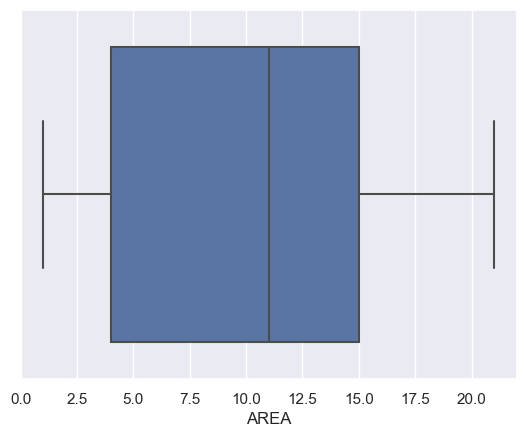

In [13]:
sns.boxplot(x=df['AREA'])

<Axes: xlabel='Crime Committed'>

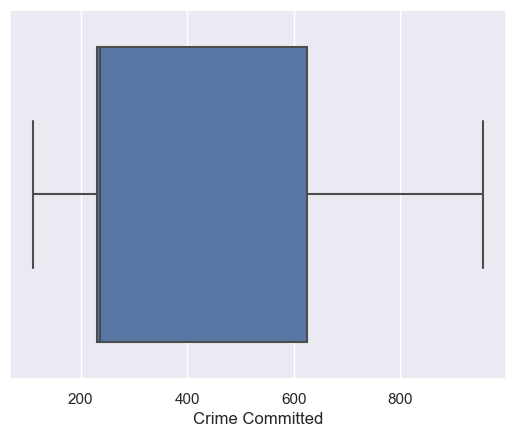

In [14]:
sns.boxplot(x=df['Crime Committed'])

Text(0.5, 0, 'AREA NAME')

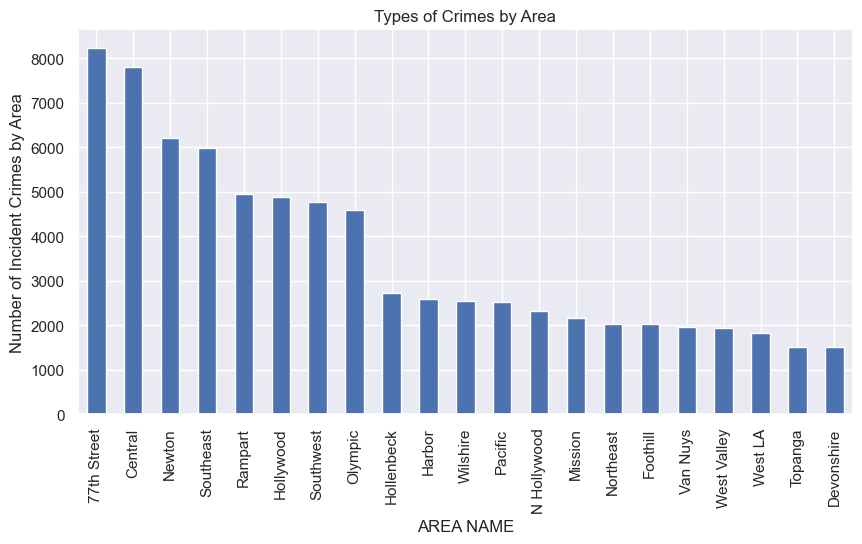

In [15]:
df.AREA_NAME.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Types of Crimes by Area")
plt.ylabel('Number of Incident Crimes by Area')
plt.xlabel('AREA NAME')

Text(0.5, 0, 'CRIME KIND')

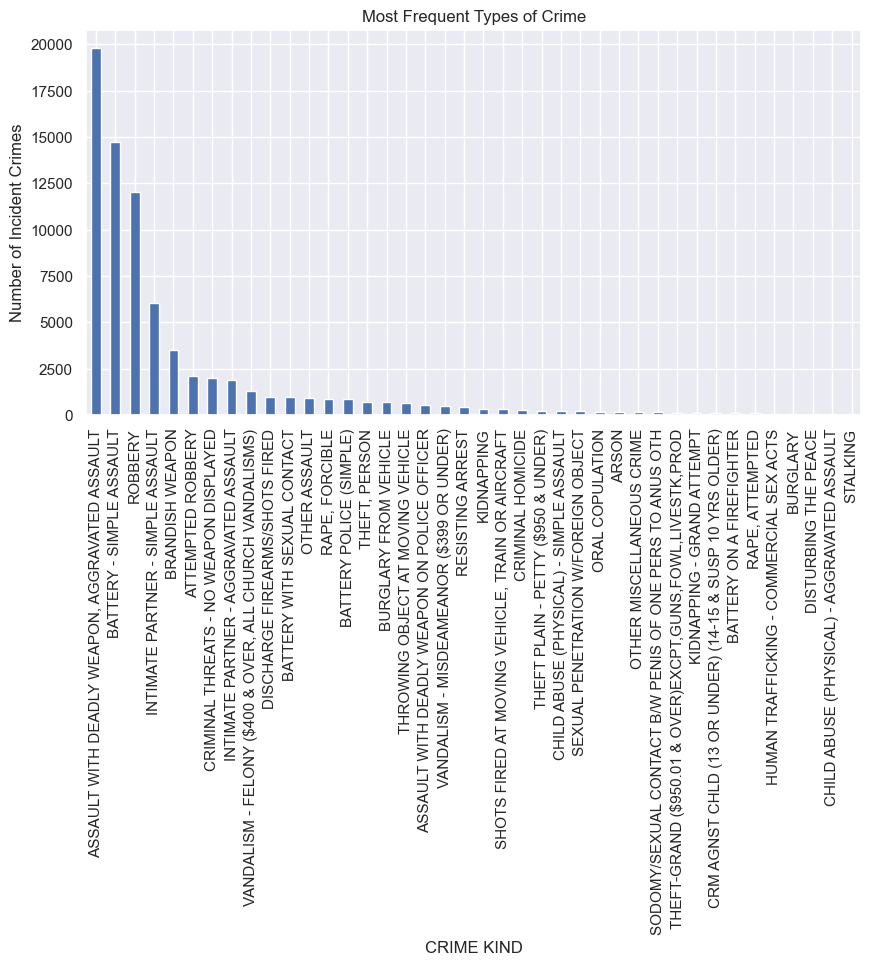

In [16]:
df.Crime_Code_Descript.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Most Frequent Types of Crime")
plt.ylabel('Number of Incident Crimes')
plt.xlabel('CRIME KIND')

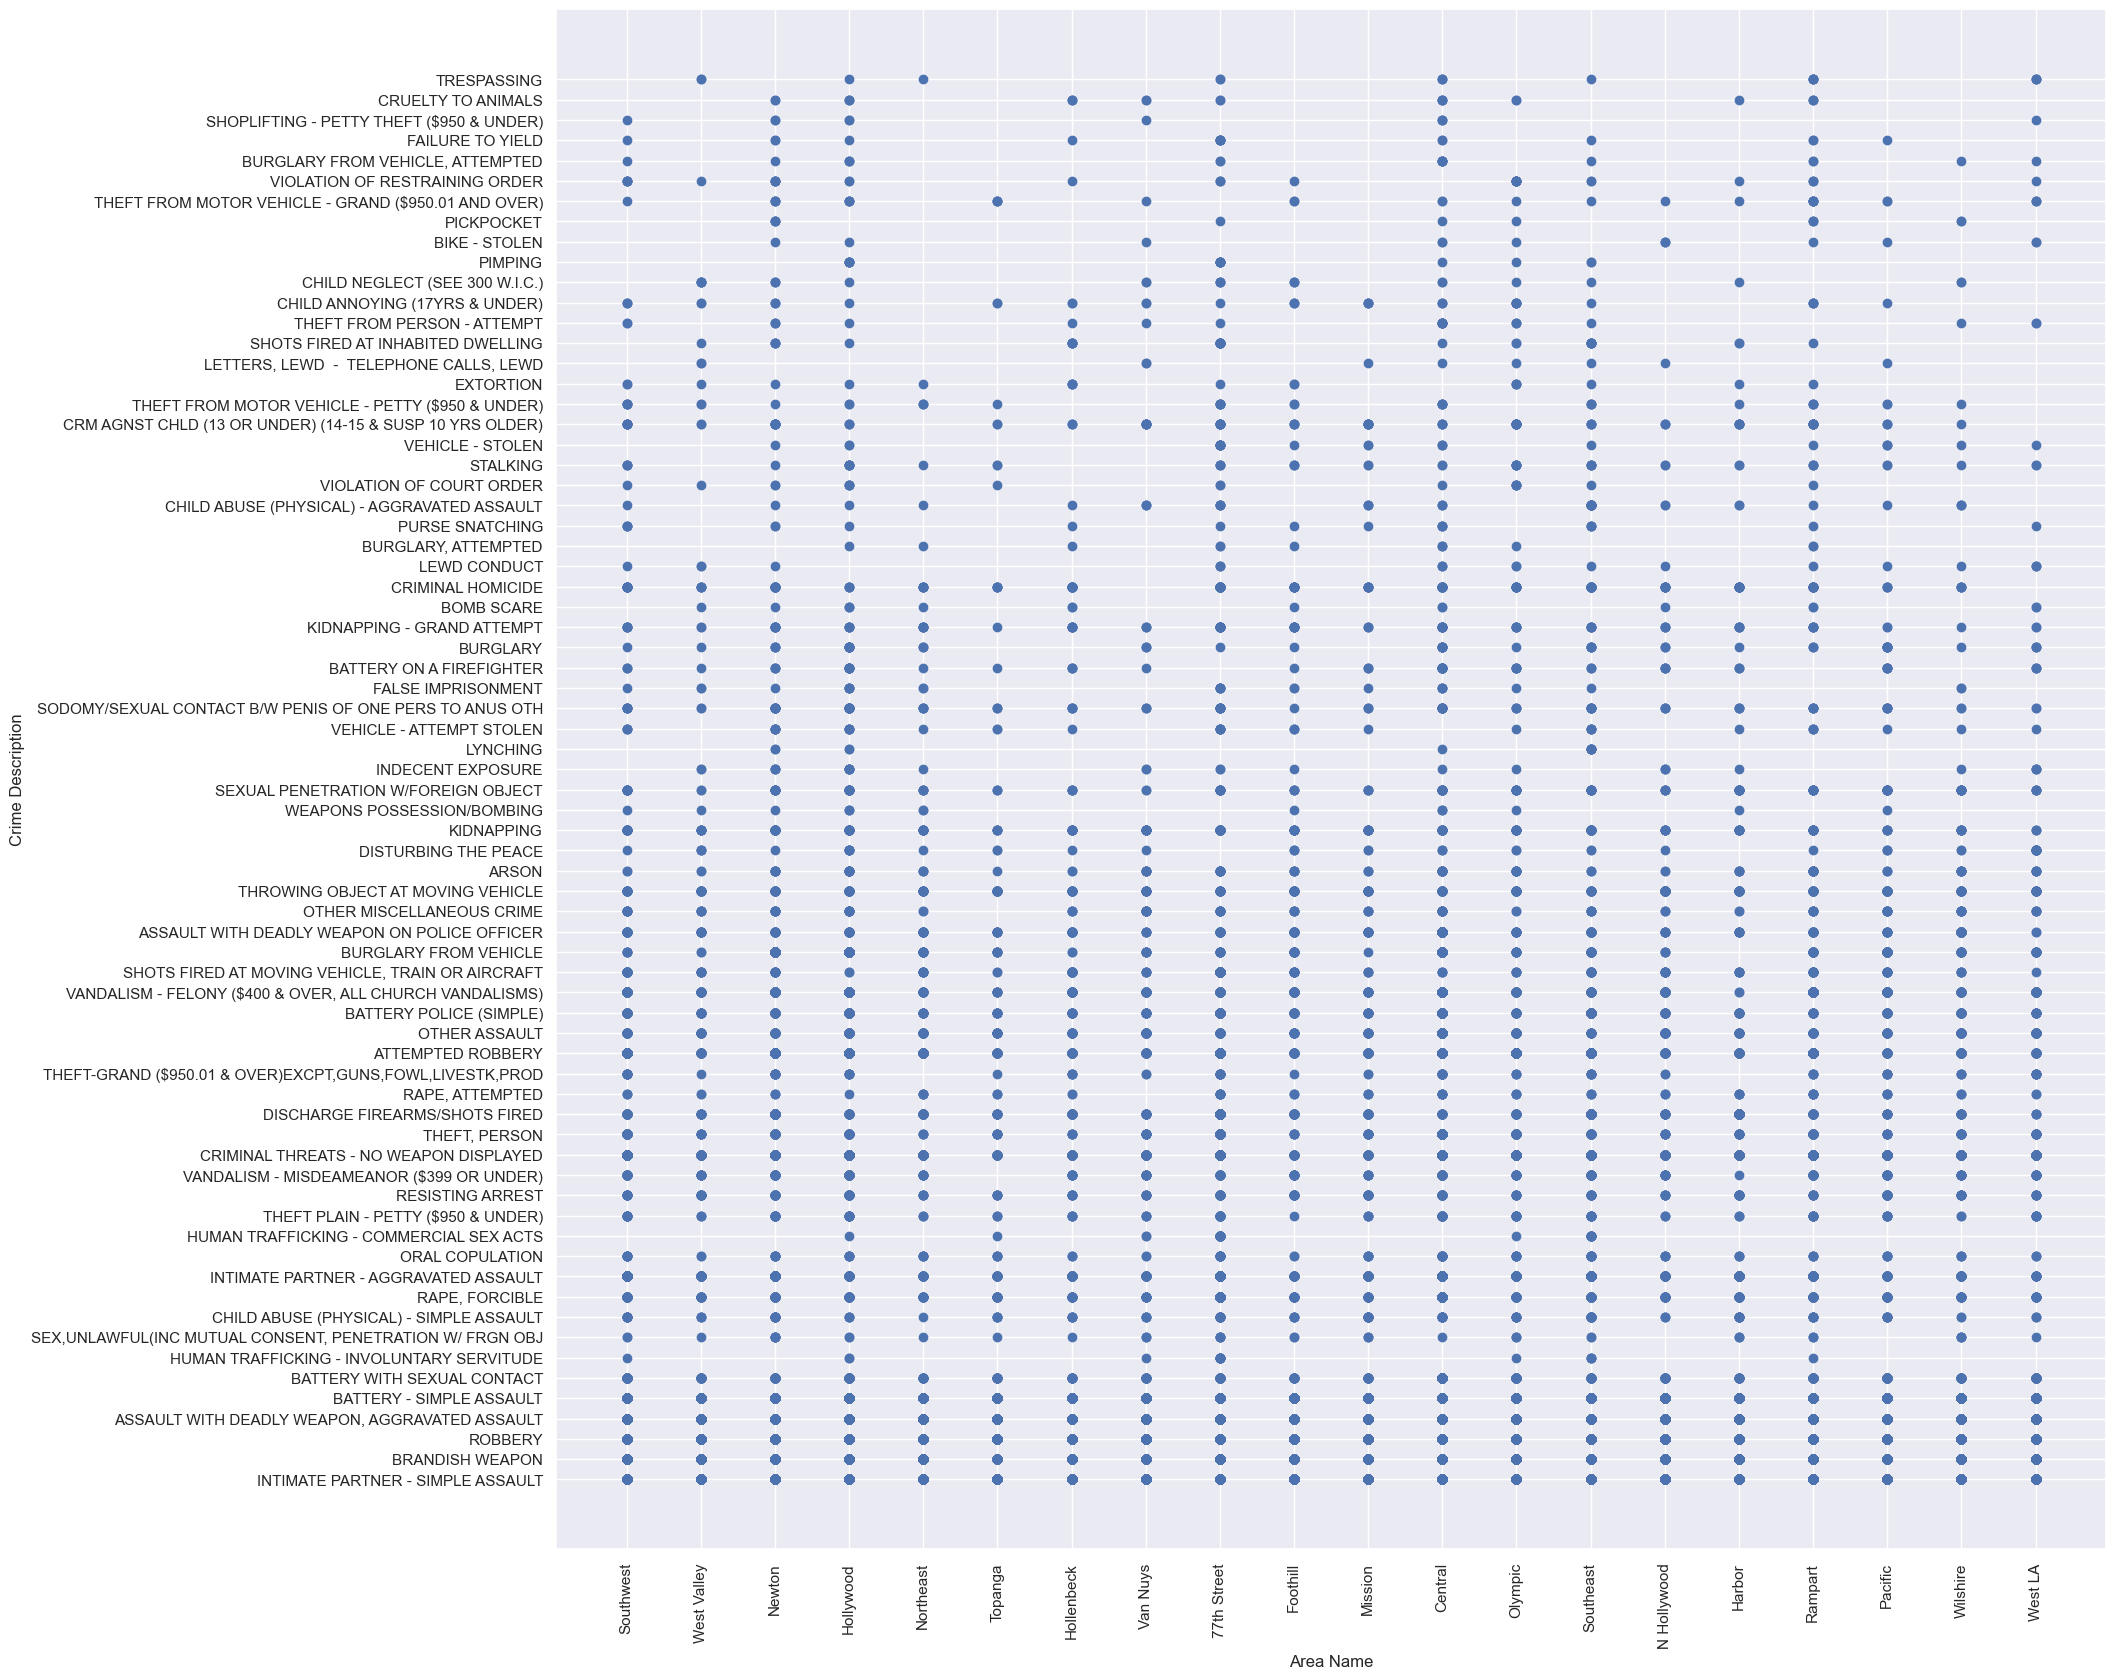

In [17]:
top_20_areas = df['AREA_NAME'].value_counts().nlargest(20).index
top_70_crimes = df['Crime_Code_Descript'].value_counts().nlargest(70).index

filtered_df = df[df['AREA_NAME'].isin(top_20_areas) & df['Crime_Code_Descript'].isin(top_70_crimes)]

fig, ax = plt.subplots(figsize=(20, 20))
ax.scatter(filtered_df['AREA_NAME'], filtered_df['Crime_Code_Descript'])
ax.set_xlabel('Area Name')
ax.set_ylabel('Crime Description')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [18]:
top_10_areas = df['AREA_NAME'].value_counts().nlargest(10).index
top_10_crimes = df['Crime_Code_Descript'].value_counts().nlargest(10).index
filtered_df = df[df['AREA_NAME'].isin(top_10_areas) & df['Crime_Code_Descript'].isin(top_10_crimes)]

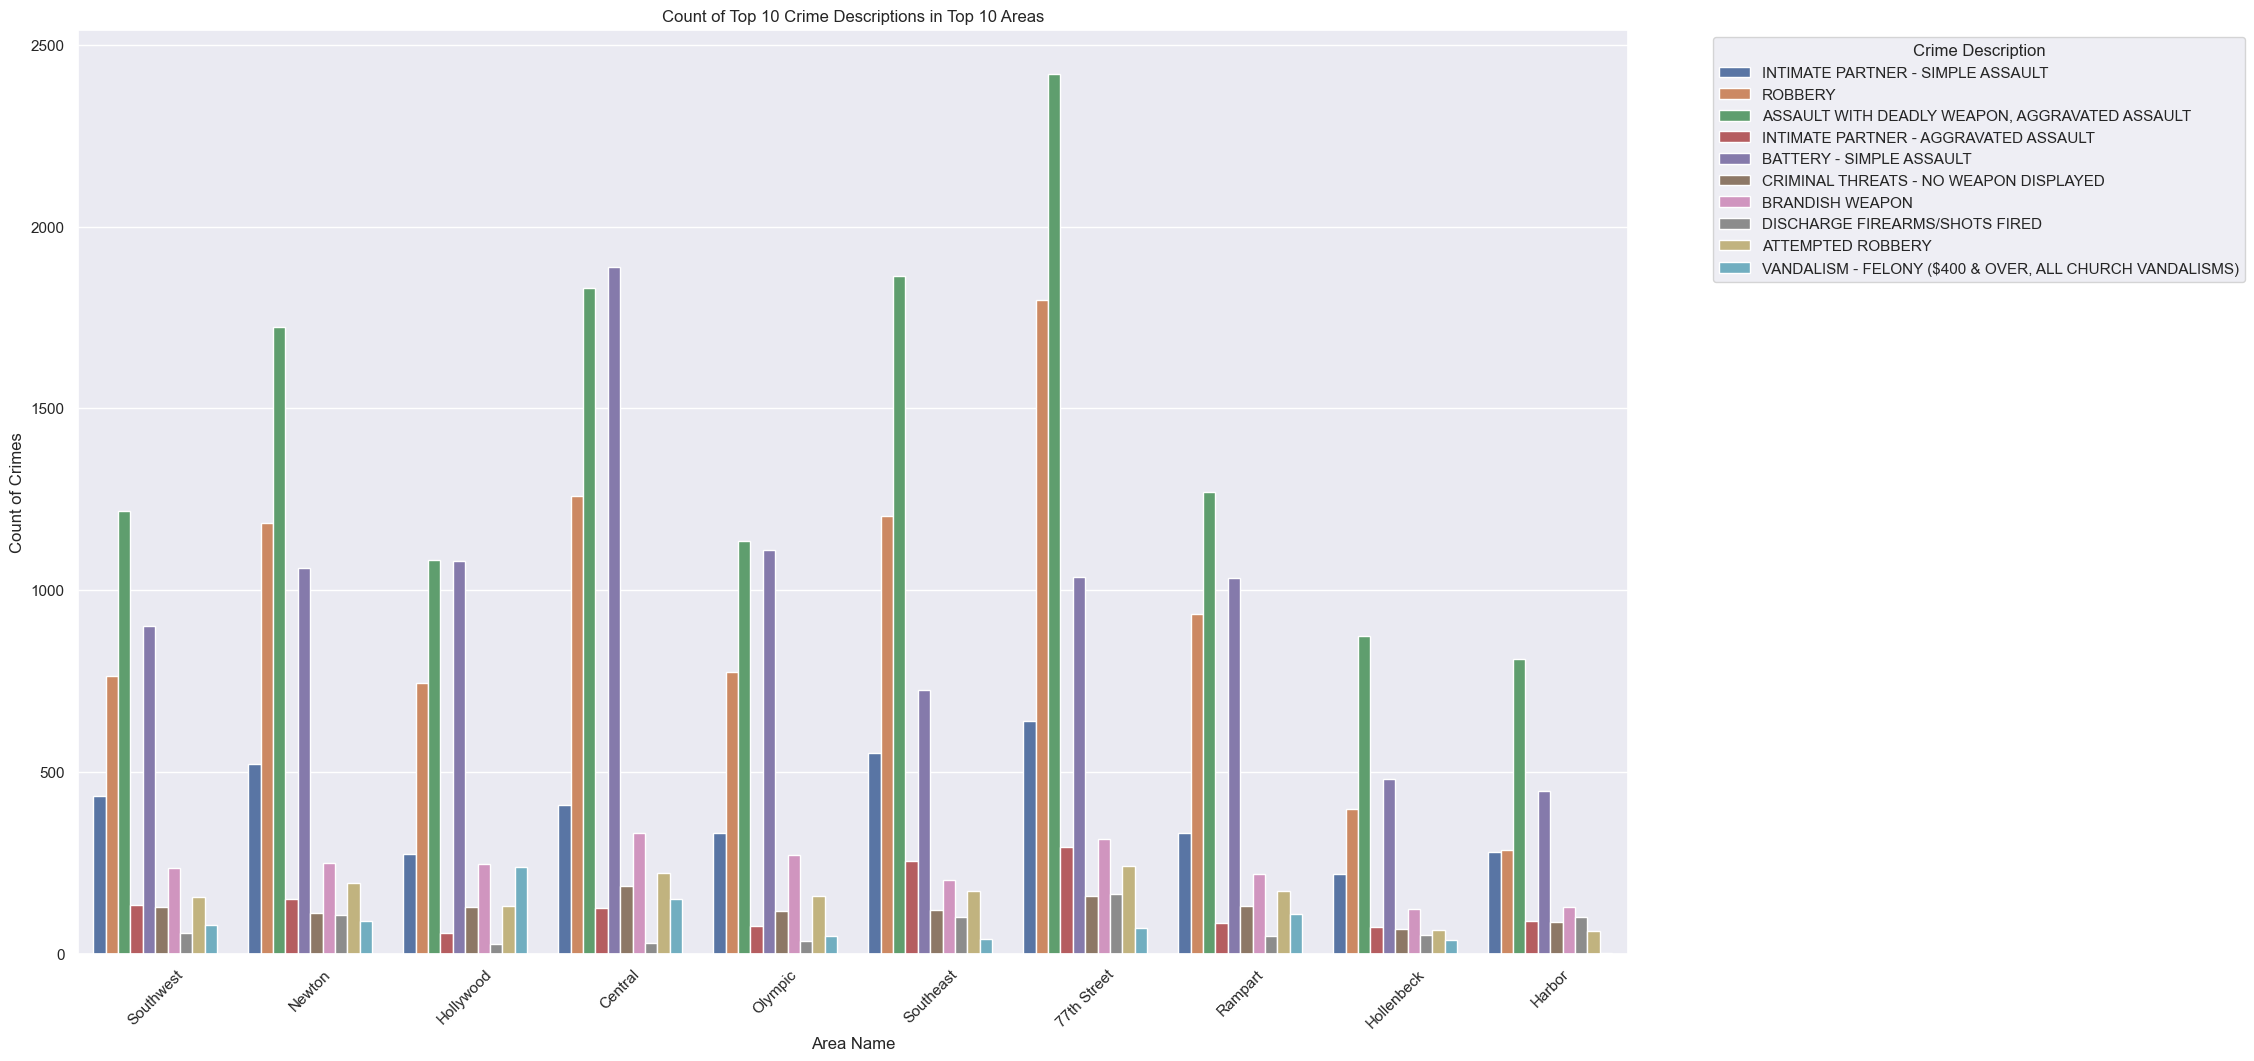

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
ax = sns.countplot(x='AREA_NAME', hue='Crime_Code_Descript', data=filtered_df)
plt.xticks(rotation=45)
plt.xlabel('Area Name')
plt.ylabel('Count of Crimes')
plt.title('Count of Top 10 Crime Descriptions in Top 10 Areas')
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### =========================================================================================================

### Now working with the ML model Directly since the data has been already analyzed
This is the first trial for training the KNN model with the data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Converting 'DATE OCC' to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Converting 'TIME OCC' to a proper time format, handling errors
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M', errors='coerce').dt.time

# Filling missing or invalid times with a default value (e.g., midnight)
df['TIME OCC'].fillna(pd.to_datetime('0000', format='%H%M').time(), inplace=True)


In [22]:
# Combining date and time into a single datetime column
df['datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['DATE OCC'], row['TIME OCC']), axis=1)

df.head(5)

,DATE OCC,TIME OCC,AREA,AREA_NAME,Crime Committed,Crime_Code_Descript,Modus Operandi,Vict Age,Vict Sex,Vict Descent,...,Premise Code Descript,Weapon Used Cd,Weapon Desc,Crime Status,Crime Status Descript,LOCATION,Cross Street,LAT,LON,datetime
90,2020-06-30,14:00:00,3,Southwest,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 2000 1814 0416 0446,25,F,B,...,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,VERMONT AV,43RD ST,34.0055,-118.2915,2020-06-30 14:00:00
150,2020-07-24,15:00:00,10,West Valley,761,BRANDISH WEAPON,1202 1822 0334,59,F,H,...,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,SHERMAN WY,ENCINO,34.2012,-118.5133,2020-07-24 15:00:00
151,2020-03-01,12:00:00,10,West Valley,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1813 0416,43,M,H,...,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,SHIRLEY,ROSCOE BL,34.2204,-118.5579,2020-03-01 12:00:00
210,2020-04-01,23:00:00,13,Newton,210,ROBBERY,1309 1313 0342 0444 0302 0449 1218 1822,50,X,H,...,BUS STOP,102.0,HAND GUN,IC,Invest Cont,12TH ST,SAN PEDRO ST,34.0337,-118.2533,2020-04-01 23:00:00
228,2020-07-02,09:40:00,6,Hollywood,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416 0444 1822 1501,52,M,W,...,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,YUCCA ST,HIGHLAND AV,34.1032,-118.3387,2020-07-02 09:40:00


In [23]:
# Feature engineering: Extracting day of the week and hour from the datetime
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

In [24]:
# Now selecting features and target variable
features = ['LAT', 'LON', 'day_of_week', 'hour']
X = df[features]
y = df['Crime_Code_Descript']

In [25]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Implementing the KNN Model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [27]:
# Making Predictions
y_pred = knn.predict(X_test)

In [28]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.25
Precision: 0.19
Recall: 0.25
F1 Score: 0.20


C:\Users\oryou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### =========================================================================================================

### Subsequently, now we are analyzing data in order to figure out why such low performance
The obvious reason for this is both the extremely skewed data and the amount of classes

In [29]:
num_classes = df['Crime_Code_Descript'].nunique()
print(f"Number of distinct classes: {num_classes}")

# Displaying all classes for better analysis

for i, class_name in enumerate(df['Crime_Code_Descript'].unique()):
    print(f"Class {i+1}: {class_name}")

Number of distinct classes: 95
Class 1: INTIMATE PARTNER - SIMPLE ASSAULT
Class 2: BRANDISH WEAPON
Class 3: ROBBERY
Class 4: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
Class 5: BATTERY - SIMPLE ASSAULT
Class 6: BATTERY WITH SEXUAL CONTACT
Class 7: HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE
Class 8: INTIMATE PARTNER - AGGRAVATED ASSAULT
Class 9: SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ
Class 10: CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
Class 11: RAPE, FORCIBLE
Class 12: ORAL COPULATION
Class 13: HUMAN TRAFFICKING - COMMERCIAL SEX ACTS
Class 14: THEFT PLAIN - PETTY ($950 & UNDER)
Class 15: RESISTING ARREST
Class 16: VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Class 17: CRIMINAL THREATS - NO WEAPON DISPLAYED
Class 18: THEFT, PERSON
Class 19: DISCHARGE FIREARMS/SHOTS FIRED
Class 20: RAPE, ATTEMPTED
Class 21: THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD
Class 22: ATTEMPTED ROBBERY
Class 23: OTHER ASSAULT
Class 24: BATTERY POLICE (SIMPLE)
Class 25: VANDALISM - FELO

#### Figuring out how to solve the data distribution issue by grouping all 95 classes in more general ones

Other    75087
Name: General_Crime_Category, dtype: int64


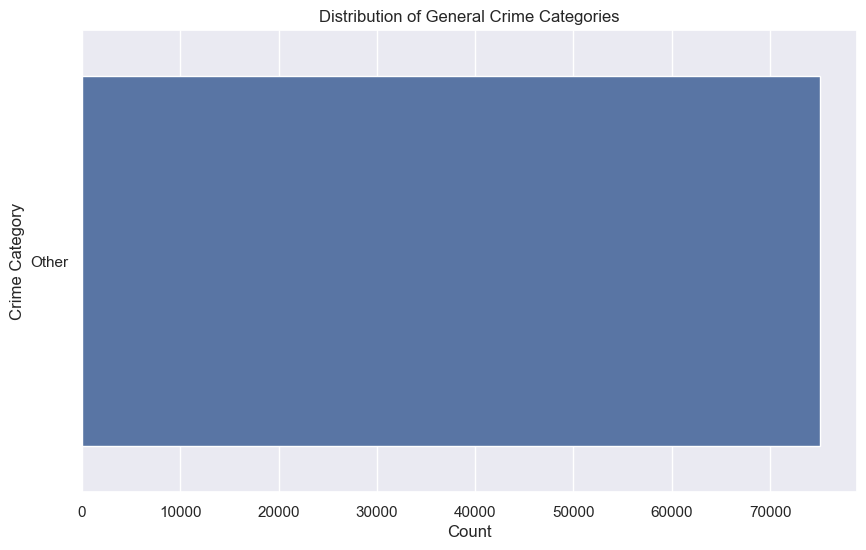

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-Loading the dataset (just in case)
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

# Initial preprocessing steps
df = df.drop(['DR_NO', 'Date Rptd', 'Rpt Dist No', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Part 1-2'], axis=1)
df = df.rename(columns={
    "Crm Cd": "Crime Committed", 
    "Crm Cd Desc": "Crime Code Descript", 
    "Mocodes": "Modus Operandi", 
    "Status" : "Crime Status", 
    "AREA NAME" : "AREA_NAME",
    "Status Desc": "Crime Status Descript", 
    "Weapon Descript" : "Weapon Used Descript", 
    "Premis Desc": "Premise Code Descript"
})
df = df.dropna()

# Applying the crime mapping
crime_mapping = {
    'Petty Theft': 'Theft-Related',
    'Grand Theft': 'Theft-Related',
    'Vehicle Theft': 'Theft-Related',
    'Simple Assault': 'Assault-Related',
    'Aggravated Assault': 'Assault-Related',
    'Domestic Violence': 'Assault-Related',
    'Residential Burglary': 'Burglary-Related',
    'Commercial Burglary': 'Burglary-Related',
    'Possession of Drugs': 'Drug-Related',
    'Drug Trafficking': 'Drug-Related',
    'Credit Card Fraud': 'Fraud-Related',
    'Identity Theft': 'Fraud-Related'
}

df['General_Crime_Category'] = df['Crime Code Descript'].map(crime_mapping).fillna('Other')

# Displaying the distribution of the new general crime categories
general_crime_distribution = df['General_Crime_Category'].value_counts()
print(general_crime_distribution)

# Plotting the distribution of general crime categories
plt.figure(figsize=(10, 6))
sns.countplot(y='General_Crime_Category', data=df, order=df['General_Crime_Category'].value_counts().index)
plt.title('Distribution of General Crime Categories')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.show()


In [31]:
# Exploring the unique crime descriptions in the dataset
unique_crime_descriptions = df['Crime Code Descript'].unique()
print(unique_crime_descriptions)

['INTIMATE PARTNER - SIMPLE ASSAULT' 'BRANDISH WEAPON' 'ROBBERY'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'BATTERY - SIMPLE ASSAULT' 'BATTERY WITH SEXUAL CONTACT'
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE'
 'INTIMATE PARTNER - AGGRAVATED ASSAULT'
 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT' 'RAPE, FORCIBLE'
 'ORAL COPULATION' 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS'
 'THEFT PLAIN - PETTY ($950 & UNDER)' 'RESISTING ARREST'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'CRIMINAL THREATS - NO WEAPON DISPLAYED' 'THEFT, PERSON'
 'DISCHARGE FIREARMS/SHOTS FIRED' 'RAPE, ATTEMPTED'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'ATTEMPTED ROBBERY' 'OTHER ASSAULT' 'BATTERY POLICE (SIMPLE)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT'
 'BURGLARY FROM VEHICLE' 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER'
 'OTHER MISCELLANEOUS CRIME' 'THROWING OBJE

Assault-Related         45776
Theft-Related           15348
Weapon-Related           5469
Threat-Related           2035
Vandalism                1803
Sexual Crime             1506
Burglary                  783
Kidnapping                488
Child Abuse               424
Resisting Arrest          412
Homicide                  288
Other                     184
Arson                     141
Human Trafficking          91
Vehicle Theft              70
Court Violation            68
Disturbing the Peace       59
Stalking                   51
Animal Cruelty             22
Extortion                  20
Trespassing                19
Traffic Violation          18
Reckless Driving            7
Conspiracy                  4
False Report                1
Name: General_Crime_Category, dtype: int64
Number of distinct classes: 25


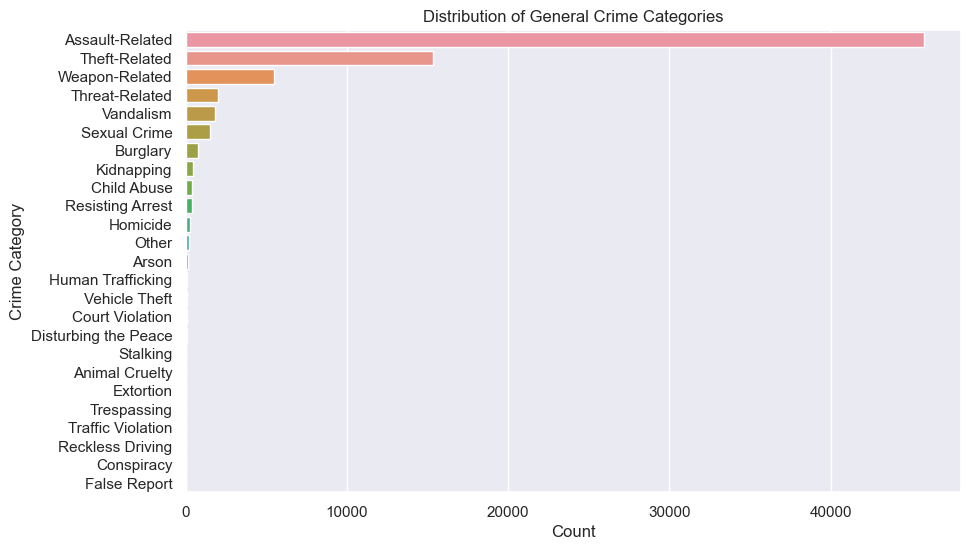

In [32]:
# Updated mapping based on the unique crime descriptions
crime_mapping = {
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'Assault-Related',
    'BRANDISH WEAPON': 'Weapon-Related',
    'ROBBERY': 'Theft-Related',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault-Related',
    'BATTERY - SIMPLE ASSAULT': 'Assault-Related',
    'BATTERY WITH SEXUAL CONTACT': 'Assault-Related',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'Human Trafficking',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault-Related',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ)': 'Sexual Crime',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'Child Abuse',
    'RAPE, FORCIBLE': 'Sexual Crime',
    'ORAL COPULATION': 'Sexual Crime',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Human Trafficking',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft-Related',
    'RESISTING ARREST': 'Resisting Arrest',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Vandalism',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'Threat-Related',
    'THEFT, PERSON': 'Theft-Related',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'Weapon-Related',
    'RAPE, ATTEMPTED': 'Sexual Crime',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'Theft-Related',
    'ATTEMPTED ROBBERY': 'Theft-Related',
    'OTHER ASSAULT': 'Assault-Related',
    'BATTERY POLICE (SIMPLE)': 'Assault-Related',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Vandalism',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'Weapon-Related',
    'BURGLARY FROM VEHICLE': 'Burglary',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault-Related',
    'OTHER MISCELLANEOUS CRIME': 'Other',
    'THROWING OBJECT AT MOVING VEHICLE': 'Weapon-Related',
    'ARSON': 'Arson',
    'DISTURBING THE PEACE': 'Disturbing the Peace',
    'KIDNAPPING': 'Kidnapping',
    'WEAPONS POSSESSION/BOMBING': 'Weapon-Related',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Crime',
    'INDECENT EXPOSURE': 'Sexual Crime',
    'THEFT PLAIN - ATTEMPT': 'Theft-Related',
    'LYNCHING': 'Assault-Related',
    'VEHICLE - ATTEMPT STOLEN': 'Vehicle Theft',
    'THREATENING PHONE CALLS/LETTERS': 'Threat-Related',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'Sexual Crime',
    'FALSE IMPRISONMENT': 'Kidnapping',
    'BATTERY ON A FIREFIGHTER': 'Assault-Related',
    'BURGLARY': 'Burglary',
    'KIDNAPPING - GRAND ATTEMPT': 'Kidnapping',
    'BUNCO, GRAND THEFT': 'Theft-Related',
    'BOMB SCARE': 'Threat-Related',
    'CRIMINAL HOMICIDE': 'Homicide',
    'LEWD CONDUCT': 'Sexual Crime',
    'BURGLARY, ATTEMPTED': 'Burglary',
    'PURSE SNATCHING': 'Theft-Related',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'Child Abuse',
    'VIOLATION OF COURT ORDER': 'Court Violation',
    'STALKING': 'Stalking',
    'MANSLAUGHTER, NEGLIGENT': 'Homicide',
    'VEHICLE - STOLEN': 'Vehicle Theft',
    'LYNCHING - ATTEMPTED': 'Assault-Related',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'Child Abuse',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft-Related',
    'EXTORTION': 'Extortion',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'Threat-Related',
    'SHOTS FIRED AT INHABITED DWELLING': 'Weapon-Related',
    'THEFT FROM PERSON - ATTEMPT': 'Theft-Related',
    'RECKLESS DRIVING': 'Reckless Driving',
    'CHILD ANNOYING (17YRS & UNDER)': 'Child Abuse',
    'CHILD STEALING': 'Kidnapping',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'Child Abuse',
    'PIMPING': 'Sexual Crime',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'Court Violation',
    'BIKE - STOLEN': 'Theft-Related',
    'PICKPOCKET': 'Theft-Related',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft-Related',
    'VIOLATION OF RESTRAINING ORDER': 'Court Violation',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'Burglary',
    'FAILURE TO YIELD': 'Traffic Violation',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft-Related',
    'CONTEMPT OF COURT': 'Court Violation',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Vehicle Theft',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Sexual Crime',
    'CRUELTY TO ANIMALS': 'Animal Cruelty',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'Theft-Related',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft-Related',
    'CONSPIRACY': 'Conspiracy',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'Weapon-Related',
    'TRESPASSING': 'Trespassing',
    'FALSE POLICE REPORT': 'False Report',
    'PANDERING': 'Sexual Crime',
    'PURSE SNATCHING - ATTEMPT': 'Theft-Related',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'Sexual Crime',
    'BUNCO, PETTY THEFT': 'Theft-Related',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft-Related',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'Weapon-Related',
    'INCITING A RIOT': 'Disturbing the Peace',
    'BUNCO, ATTEMPT': 'Theft-Related',
    'GRAND THEFT / INSURANCE FRAUD': 'Theft-Related'
}

# Applying the updated crime mapping
df['General_Crime_Category'] = df['Crime Code Descript'].map(crime_mapping).fillna('Other')

# Displaying the distribution of the new general crime categories
general_crime_distribution = df['General_Crime_Category'].value_counts()
print(general_crime_distribution)

# Displaying total number of classes
num_classes = df['General_Crime_Category'].nunique()
print(f"Number of distinct classes: {num_classes}")

# Plotting the distribution of general crime categories 
plt.figure(figsize=(10, 6))
sns.countplot(y='General_Crime_Category', data=df, order=df['General_Crime_Category'].value_counts().index)
plt.title('Distribution of General Crime Categories')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.show()


#### =========================================================================================================
### Retraining phase. 
After 3 different trials adding more feature enginering, normalization, hyperparameter tuning and SMOTEENN we got success! A working model with over 99% of accuracy ＼(＾▽＾)／

In [33]:
# Retraining the KNN model given this new class distribution

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Converting 'DATE OCC' to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extracting useful features from 'DATE OCC' and 'TIME OCC'
df['DayOfWeek'] = df['DATE OCC'].dt.dayofweek  # Day of the week as a number (Monday=0, Sunday=6)
df['HourOfDay'] = df['TIME OCC'] // 100  #Extracting hour from 'TIME OCC'

# Selecting relevant features and target variable
X = df[['AREA_NAME', 'DayOfWeek', 'HourOfDay']]
y = df['General_Crime_Category']

# Converting categorical variables to numerical
X = pd.get_dummies(X, columns=['AREA_NAME'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Accuracy: 0.5659874816886403
Precision: 0.4310476024299044
Recall: 0.5659874816886403
F1 Score: 0.4802829635902924


C:\Users\oryou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Retraining by adding additional features, doing hyperparameter tuning, and normalization

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# I decided to repeat a couple of steps to avoid any issues in the training/testing moment

# Converting 'DATE OCC' to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extracting useful features from 'DATE OCC' and 'TIME OCC'
df['DayOfWeek'] = df['DATE OCC'].dt.dayofweek  # Day of the week as a number (Monday=0, Sunday=6)
df['HourOfDay'] = df['TIME OCC'] // 100 
df['Month'] = df['DATE OCC'].dt.month  
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Whether it is a weekend

# Selecting relevant features and target variable
X = df[['AREA_NAME', 'DayOfWeek', 'HourOfDay', 'Month', 'IsWeekend']] 
y = df['General_Crime_Category']

# Converting categorical variables to numerical
X = pd.get_dummies(X, columns=['AREA_NAME'])

# Normalizing the feature data by using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and tuning the KNN classifier using GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_knn = grid_search.best_estimator_

# Making predictions
y_pred = best_knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Best k: {grid_search.best_params_["n_neighbors"]}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


C:\Users\oryou\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best k: 30
Accuracy: 0.6143294713011054
Precision: 0.4315036133145737
Recall: 0.6143294713011054
F1 Score: 0.4753893873760545


C:\Users\oryou\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Retraining by Removing smaller classes and applying SMOTEENN
# 
# Be noted that SMOTEENN is combines SMOTE for oversampling the minority classes and 
# edited Nearest Neighbors (ENN) for undersampling the majority classes.


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# I decided to repeat a couple of steps to avoid any issues in the training/testing moment

# Converting 'DATE OCC' to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

# Extracting useful features from 'DATE OCC' and 'TIME OCC'
df['DayOfWeek'] = df['DATE OCC'].dt.dayofweek  # Day of the week as a number (Monday=0, Sunday=6)
df['HourOfDay'] = df['TIME OCC'] // 100  
df['Month'] = df['DATE OCC'].dt.month 
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Whether it is a weekend

# Selecting relevant features and target variable
X = df[['AREA_NAME', 'DayOfWeek', 'HourOfDay', 'Month', 'IsWeekend']] 
y = df['General_Crime_Category']

# Removing very small classes to ensure the SMOOTEEEN works
min_samples = 5
class_counts = y.value_counts()
to_remove = class_counts[class_counts < min_samples].index
X = X[~y.isin(to_remove)]
y = y[~y.isin(to_remove)]

# Converting categorical variables to numerical
X = pd.get_dummies(X, columns=['AREA_NAME'])

# Normalizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying SMOTEENN to balance the dataset
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initializing and tuning the KNN classifier using GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_knn = grid_search.best_estimator_

# Making predictions
y_pred = best_knn.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Best k: {grid_search.best_params_["n_neighbors"]}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Best k: 1
Accuracy: 0.9937485849412594
Precision: 0.9937271938368436
Recall: 0.9937485849412594
F1 Score: 0.9937212733650264


#### =========================================================================================================

### Given this success, now we'll proceed with cross-validation to test the model's robustness and will also save the model

In [36]:
# Given this success!! Now we'll proceed with cross-validation to test the model's robustness and will also save the model

from sklearn.model_selection import cross_val_score
import joblib

# Performing cross-validation
cv_scores = cross_val_score(best_knn, X_resampled, y_resampled, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')
print(f'Standard deviation of cross-validation accuracy: {cv_scores.std()}')

# Ensuring the columns are saved
feature_columns = X.columns.tolist()

# Saving the model and columns
joblib.dump(feature_columns, 'feature_columns.pkl')
joblib.dump(best_knn, 'knn_model.pkl')
print("Model saved as 'knn_model.pkl'")



Cross-validation accuracy scores: [0.99284924 0.99361651 0.99379261 0.99397499 0.99371085]
Mean cross-validation accuracy: 0.9935888405323137
Standard deviation of cross-validation accuracy: 0.00038815011292357986
Model saved as 'knn_model.pkl'
